# Basic Operations on Quantum Objects

In [2]:
# import qutip modules libraries
from qutip import *

# import useful libraries
import numpy as np
import matplotlib.pyplot as plt


## Two coupled qubit

First, let’s consider a system of two coupled qubits.  
Assume that both qubits have equal energy splitting, and that the qubits are coupled through a $\sigma_x \sigma_x$ interaction with strength $g = 0.05$ (in units where the bare qubit energy splitting is unity).  

The Hamiltonian describing this system is:

$$
H = \omega\sigma_1^{z} + \omega\sigma_2^{z}
    + g\,\sigma_1^{x}\sigma_2^{x}.
$$

Setting $\omega = 1$ (i.e. using units where the bare splitting is 1) and $g = 0.05$, we have

$$
H = (\sigma_1^{z} + \sigma_2^{z}) + 0.05\,\sigma_1^{x}\sigma_2^{x}.
$$

In [3]:
H = tensor(sigmaz(), identity(2)) + tensor(identity(2), sigmaz()) + 0.05 * tensor(sigmax(), sigmax())

print(H)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 2.    0.    0.    0.05]
 [ 0.    0.    0.05  0.  ]
 [ 0.    0.05  0.    0.  ]
 [ 0.05  0.    0.   -2.  ]]


## A two-level system coupled to a cavity: The Jaynes-Cummings model

The simplest possible quantum mechanical description for light-matter interaction is encapsulated in the Jaynes-Cummings model, which describes the coupling between a two-level atom and a single-mode electromagnetic field (a cavity mode). Denoting the energy splitting of the atom and cavity `omega_a` and `omega_c`, respectively, and the atom-cavity interaction strength `g`, the Jaynes-Cummings Hamiltonian can be constructed as:

(<Figure size 1200x1200 with 2 Axes>, <Axes: >)

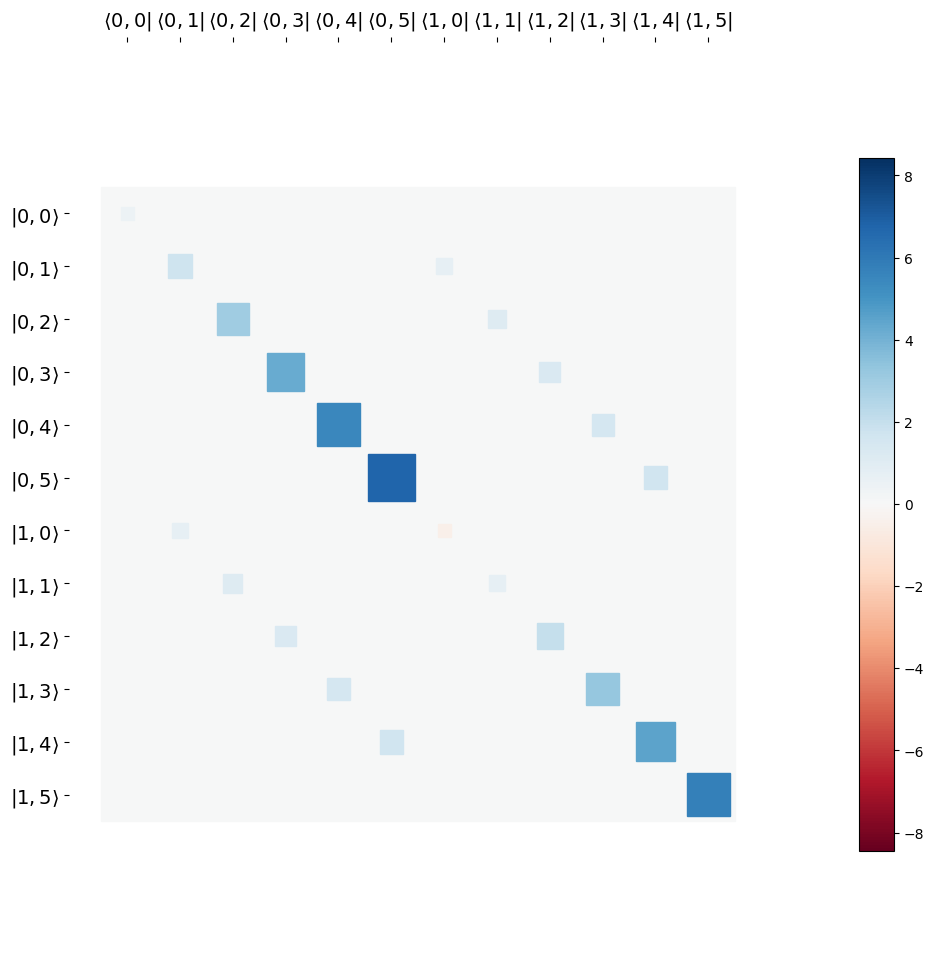

In [10]:
N = 6

omega_a = 1.0

omega_c = 1.25

g = 0.75

a = tensor(identity(2), destroy(N))

sm = tensor(destroy(2), identity(N))

sz = tensor(sigmaz(), identity(N))

H = 0.5 * omega_a * sz + omega_c * a.dag() * a + g * (a.dag() * sm + a * sm.dag())

hinton(H, fig=plt.figure(figsize=(12, 12)))

(<Figure size 1200x1200 with 2 Axes>, <Axes: >)

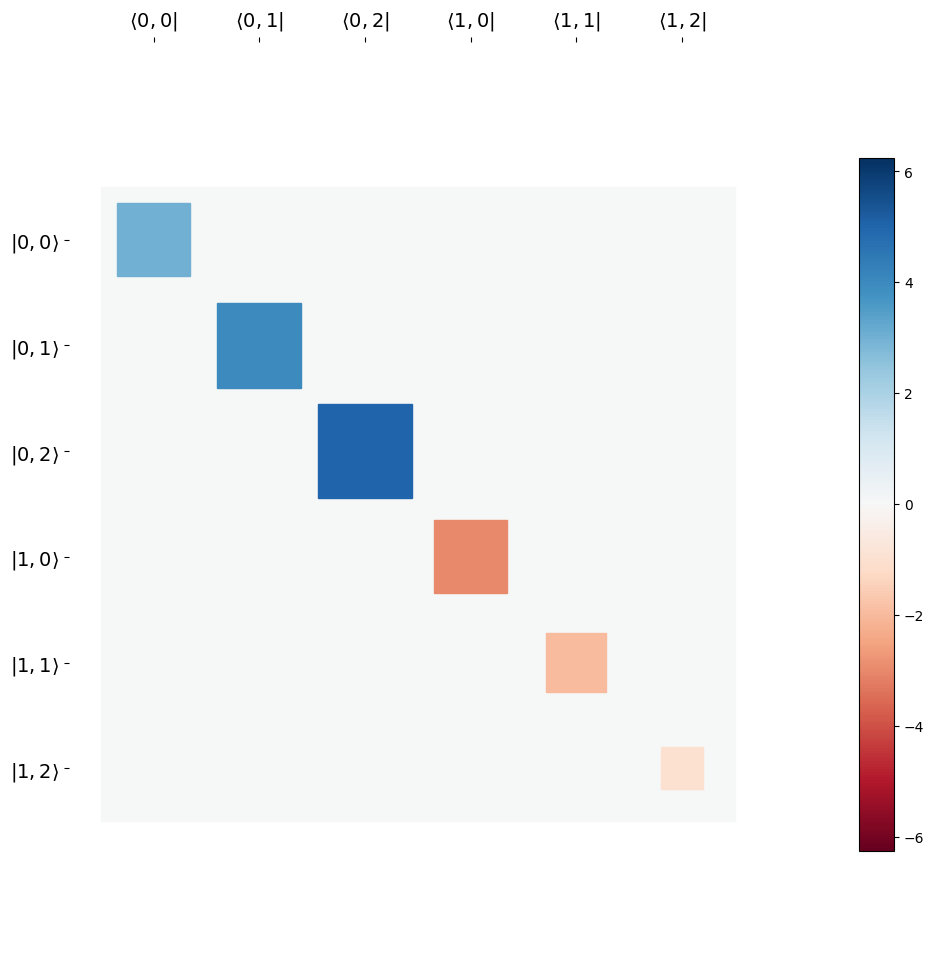

In [26]:
N = 3

omega_q = 6

omega_0 = 1

g = 0

a = tensor(identity(2), destroy(N))

sm = tensor(destroy(2), identity(N))

sz = tensor(sigmaz(), identity(N))

H = 0.5 * omega_q * sz + omega_0 * a.dag() * a + g * (a.dag() * sm + a * sm.dag())

hinton(H, fig=plt.figure(figsize=(12, 12)))

In [32]:
eigs = H.eigenstates()

# Extract eigenvalues
eigenvalues = np.round(eigs[0], 6)  # rounded for readability

print("\nEigenvalues:", eigenvalues)


Eigenvalues: [-3. -2. -1.  3.  4.  5.]


In [33]:
state_d0 = eigs[1][0]
state_d0

Quantum object: dims=[[2, 3], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]

In [34]:
state_d1 = eigs[1][1]
state_d1

Quantum object: dims=[[2, 3], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]

In [36]:
state_d2 = eigs[1][2]
state_d2

Quantum object: dims=[[2, 3], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]

In [37]:
state_u0 = eigs[1][3]
state_u0

Quantum object: dims=[[2, 3], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]